In [1]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

In [2]:
import os

import FACSPy as fp
import scanpy as sc

import figure_config as cfg

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib import gridspec

from matplotlib.figure import Figure
from matplotlib.axes import Axes
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerBase

In [4]:
sf = fp.read_dataset(cfg.data_input, "dataset_NK_SF_preprocessed")
sf.uns["metadata"].dataframe["group"] = sf.uns["metadata"].dataframe["diag_main"]
sf.uns["metadata"].dataframe["organ_diag_plot"] = [
    f"{diag}: {organ}" for organ, diag
    in zip(sf.uns["metadata"].dataframe["organ"].tolist(), sf.uns["metadata"].dataframe["diag_main"].tolist())
]

In [5]:
fp.settings.default_gate = "NK_cells"
fp.settings.default_layer = "transformed"
fp.tl.mfi(sf)
fp.tl.pca_samplewise(sf)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\tarik\RGBLab\Franca\NK_spectral_full\code\figure_config.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = AXIS_LABEL_SIZE)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\tarik\RGBLab\Franca\NK_spectral_full\code\figure_config.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = AXIS_LABEL_SIZE)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\tarik\RGBLab\Franca\NK_spectral_full\code\figure_config.py:32: UserWarning: FixedFor

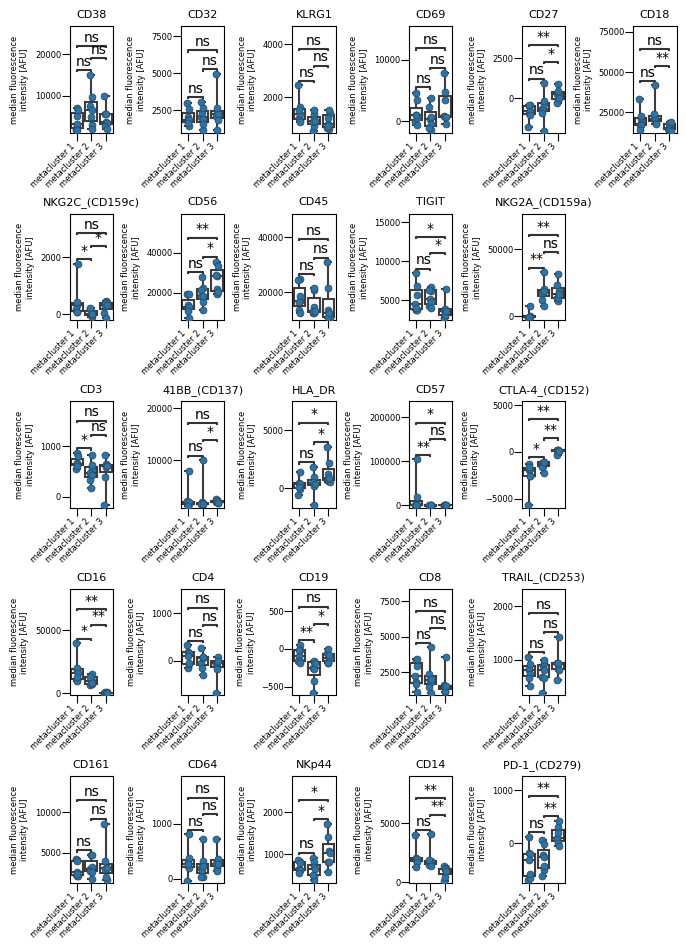

In [6]:
#################
### FIGURE S3 ###
#################

fp.settings.default_gate = "NK_cells"
fp.settings.default_layer = "compensated"
fig = plt.figure(layout = "constrained", figsize = (cfg.FIGURE_WIDTH_FULL, cfg.FIGURE_HEIGHT_FULL))
gs = gridspec.GridSpec(ncols = 6,
                       nrows = 5,
                       figure = fig)
plot_params = {
    "adata": sf,
    "show": False,
    "data_group": "leiden_group",
    "groupby": "leiden_group"
}

marker_count = 0
markers = sf.var_names.tolist()
markers = [marker for marker in markers if not marker in ["Zombie_NIR", "CD66b"]]
for i in range(6):
    for j in range(5):
        marker = fig.add_subplot(gs[j,i])
        marker_plot = fp.pl.mfi(
            **plot_params,
            marker = markers[marker_count],
            ax = marker
        )
        ymin, ymax = marker_plot.get_ylim()
        marker_plot.set_ylim(ymin, ymax*1.1)
        cfg._adjust_xlabels(marker_plot)
        marker_plot.set_ylabel(f"median fluorescence\nintensity [AFU]", fontsize = cfg.AXIS_LABEL_SIZE)
        cfg._adjust_ylabels(marker_plot)
        marker_plot.tick_params(size = cfg.AXIS_LABEL_SIZE, pad = 0)
        marker_plot.set_title(markers[marker_count], fontsize = cfg.TITLE_SIZE)
        marker = fig.add_subplot(marker_plot)
        marker_count += 1
        if marker_count == len(markers):
            break

plt.savefig(f"{cfg.figure_output}FigureS3.pdf", dpi = 300, bbox_inches ="tight")
plt.show()
    